# 앙상블모델


In [18]:
# 앙상블의 결과가 좋은지 확인하기 

### 1 문제정의
 - 유방암 데이터셋을 사용해서 유방암 분류하기


### 2 데이터 수집

In [32]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### 3 데이터 전처리

### 4 탐색적 데이터 분석

### 5 모델 선택 및 하이퍼파라미터 튜닝

In [64]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], 
                                                    cancer['target'], 
                                                    random_state=66)

In [21]:
cancer['target_names']

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [73]:
#Ensemble - Bagging
#RandomForest

from sklearn.ensemble import RandomForestClassifier
forest50 = RandomForestClassifier(n_estimators=50, random_state=5)
forest70 = RandomForestClassifier(n_estimators=70, random_state=5)
forest90 = RandomForestClassifier(n_estimators=90, random_state=5)

### 6 학습

In [38]:
#1개 모델
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
#1개 모델
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
# n_estimators = 50
forest50.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=5)

In [75]:
# n_estimators = 70
forest70.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70, random_state=5)

In [76]:
# n_estimators = 90
forest90.fit(X_train, y_train)

RandomForestClassifier(n_estimators=90, random_state=5)

### 7 평가 및 결과

In [42]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
# 성능은 낮다
# 최적화(일반화)는 잘 되어있다 : train과 test의 차이가 적다!

0.9483568075117371
0.916083916083916


In [44]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
# 성능은 높다
# 최적화(일반화)는 안 되어있다 : train과 test의 차이가 크다
# 안정적이 않다

1.0
0.9300699300699301


In [71]:
print(forest50.score(X_train, y_train))
print(forest50.score(X_test, y_test))
# 성능이 아주 높다
# dt 단일 모델에 비해 테스트의 점수가 높아졌고, train과 test의 차이가 적음
# 최적화(일반화)도 잘 되어있음
# 단점) 시간이 오래 걸린다 => 하드웨어 발전으로 큰 단점은 아님

1.0
0.951048951048951


In [70]:
print(forest70.score(X_train, y_train))
print(forest70.score(X_test, y_test))

1.0
0.972027972027972


In [77]:
print(forest90.score(X_train, y_train))
print(forest90.score(X_test, y_test))

1.0
0.965034965034965


RandomForest 결과 

1) n_estimators = 90
    - 규칙이 너무 train에 맞춰져다, 규칙이 복잡하다 
    - 과대 적합

2) n_estimators = 70
    - 100보다는 규칙이 적다. 규칙이 적당해서 새로운 걸 잘 맞춘다
    - 일반화가 잘되어있다 

3)  n_estimators = 50
    - 규칙이 너무 없어서 잘 못 맞춤
    - 과소 적합

※ 머신러닝에서는 test 성능이 잘 나오는 결과를 찾아가야 한다!!※ 

# 특성 중요도

In [53]:
# 특성 중요도
# 전체의 합이 1
# 숫자가 클수록 중요한 특성
forest.feature_importances_

array([0.0322032 , 0.01095651, 0.02233023, 0.08403761, 0.00480733,
       0.00466256, 0.03312358, 0.11573144, 0.00456405, 0.00334231,
       0.01560718, 0.00589607, 0.01713896, 0.03739631, 0.00598182,
       0.00328501, 0.00686953, 0.00553368, 0.0073966 , 0.00380384,
       0.20345397, 0.01518098, 0.11226959, 0.07651857, 0.01251461,
       0.00574185, 0.04344253, 0.09313663, 0.00377726, 0.00929616])

In [56]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

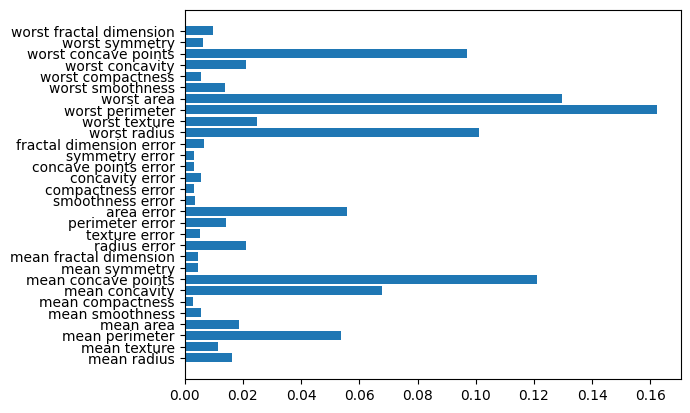

In [79]:
# y축을 기준으로 그려지는 그래프 :barh() , x축 : bar()
# 여러 개의 Decision Tree를 종합하기 때문에 어저따가 한 번씩 사용된 컬럼이 작은 값을 차지
# 많이 사용된 값이 큰 값을 차지함
plt.barh(range(30),forest70.feature_importances_)
plt.yticks(np.arange(30), cancer['feature_names'])
plt.show()

In [ ]:
# 앙상블 중 RandomForest는 거의 모든 컬럼을 사용한다. 
# worst perimeter 값이 예측에 가장 영향을 많이 준 특성!

In [85]:
# Ensemble의 Boosting계열!
# AdaBoost 모델
# n_estimators = 몇 번 연결해서 사용할건가?
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=5)

In [86]:
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=5)

In [87]:
ada.score(X_test,y_test)

0.986013986013986

In [88]:
# ada모델 성능이 가장 괜찮게 나왔으니까 진짜 성능
from sklearn.model_selection import cross_val_score
cross_val_score(ada, X_train, y_train, cv = 5).mean()

0.969439124487004

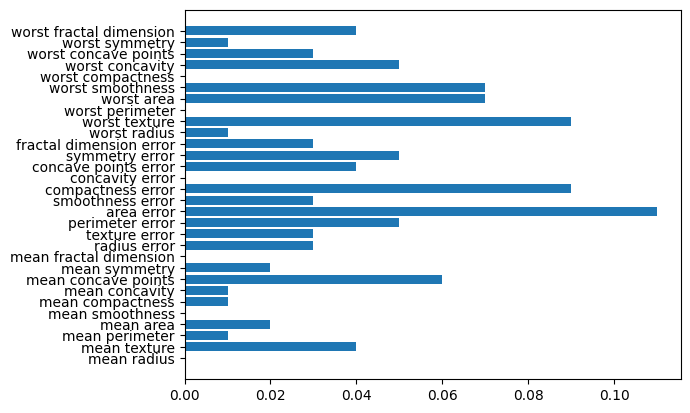

In [90]:
# ada 모델 여러번의 Decision Tree를 사용
plt.barh(range(30),ada.feature_importances_)
plt.yticks(np.arange(30), cancer['feature_names'])
plt.show()

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gra = GradientBoostingClassifier(n_estimators=100)

In [92]:
gra.fit(X_train,y_train)

GradientBoostingClassifier()

In [93]:
gra.score(X_test,y_test)

0.958041958041958